# Metody klasteryzacji danych na przykładzie wyodrębniania palety kolorów

[**Grupowanie**](https://pl.wikipedia.org/wiki/Analiza_skupie%C5%84) (analiza skupień, klasteryzacja; ang. data clustering) – metoda nienadzorowanej klasyfikacji statystycznej. Jest to metoda dokonująca grupowania elementów we względnie jednorodne klasy. Podstawą grupowania w większości algorytmów jest podobieństwo pomiędzy elementami – wyrażone przy pomocy funkcji (metryki) podobieństwa.

Poprzez grupowanie można również rozwiązać problemy z gatunku odkrywania struktury w danych oraz dokonywanie uogólniania. Grupowanie polega na wyodrębnianiu grup (klas, podzbiorów).

## Metody klasteryzacji ujęte w tym dokumencie:
- metoda k-średnich (k-means)
- metoda aglomeracyjna (agglomerative)
- metoda MeanShift

## Dane źródłowe
Za dane źródłowe posłuży obraz w formacie PNG o rozmiarze 64 × 64 px

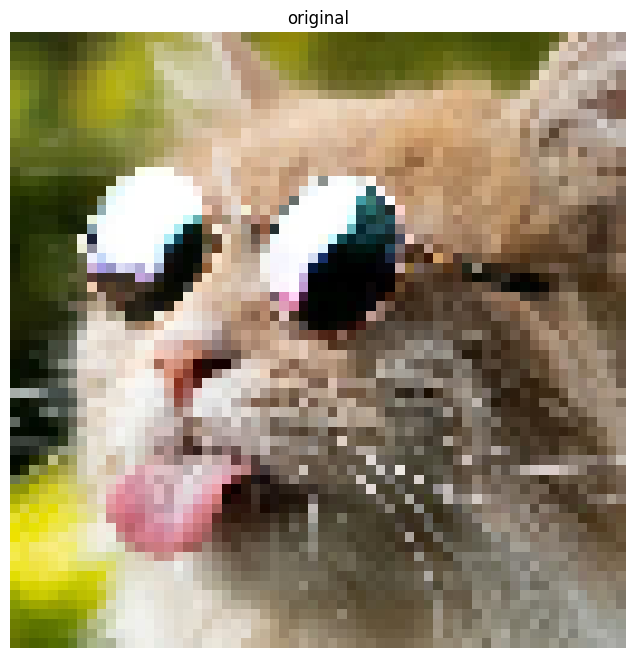

In [1]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

np.random.seed(7)

image = iio.imread("cat_64.png")
pixels = np.unique(np.array([px[:-1] for px in image.reshape(image.shape[0] * image.shape[1], image.shape[2])]), axis=0)

plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('original')
plt.imshow(image)

Kilka funkcji do prezentacji danych

In [66]:
# obraz oryginalny
def show_image(image, title, fig, *args):
    ax = fig.add_subplot(*args)
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

# wykres przynależności oraz zgromadzenie kolorów palety
def scatter(pixels, mapping, fig, *args):
    palette = []
    ax = fig.add_subplot(*args, projection='3d')
    for i in np.unique(mapping):
        color = np.mean(pixels[mapping == i], axis=0)
        palette.append(color)
        ax.scatter(pixels[mapping == i, 0], pixels[mapping == i, 1], pixels[mapping == i, 2], c=[color / 256], marker='o')
    ax.set_title('paletted distribution')
    ax.set_xlabel('red')
    ax.set_ylabel('green')
    ax.set_zlabel('blue')
    return palette

# metoda do zastępowania kolorów
def substitute(image, palette):
    img = np.empty(image.shape, dtype=image.dtype)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            pixel = image[x][y][:-1]
            dists = distance.cdist([pixel], palette, metric='euclidean')
            img[x][y] = [*[color.item() for color in palette[np.argmin(dists)]], 255]
    return img

# 1. Metoda K-średnich

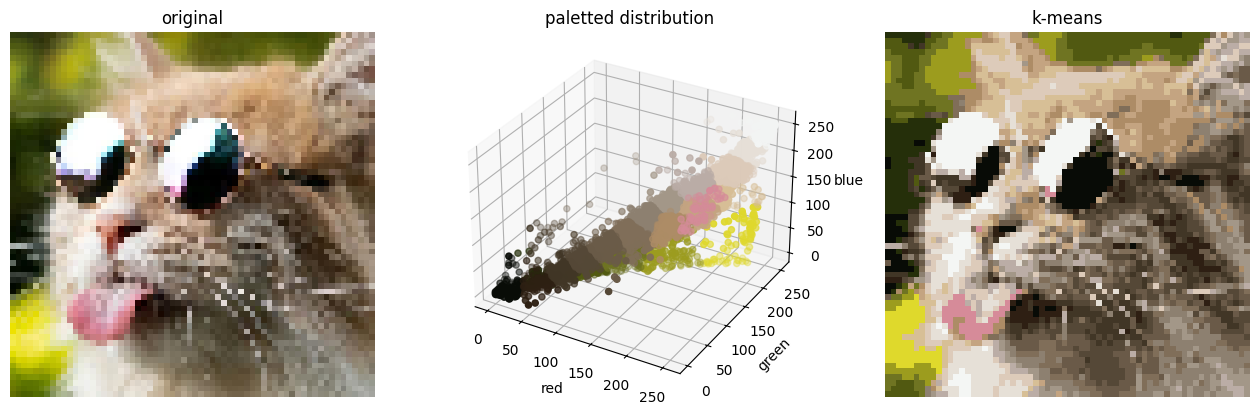

In [67]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(16,16))

# parametry
palette_size = 21

# obraz porównawczy
show_image(image, 'original', fig, 1, 3, 1)

# algorytm
km = KMeans(n_clusters=palette_size)
mapping = km.fit_predict(pixels)
palette = scatter(pixels, mapping, fig, 1, 3, 2)

# obraz ze zredukowaną paletą
image2 = substitute(image, palette)
show_image(image2, 'k-means', fig, 1, 3, 3)

plt.show()

# 2. Metoda aglomeracyjna

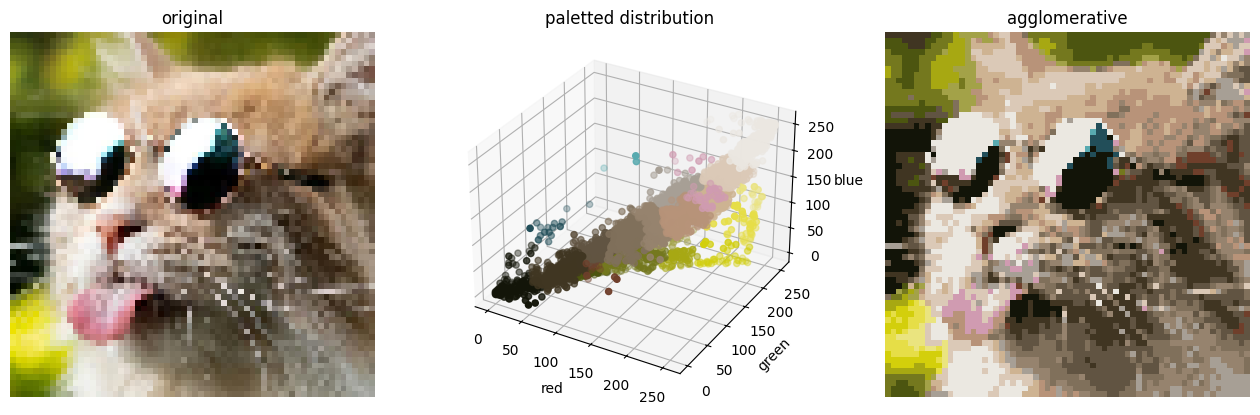

In [68]:
from sklearn.cluster import AgglomerativeClustering
fig = plt.figure(figsize=(16,16))

# parametry
palette_size = 21
metric = 'euclidean'

# obraz porównawczy
show_image(image, 'original', fig, 1, 3, 1)

# algorytm
ac = AgglomerativeClustering(n_clusters=palette_size, metric=metric, linkage='complete')
mapping = ac.fit_predict(pixels)
palette = scatter(pixels, mapping, fig, 1, 3, 2)

# obraz ze zredukowaną paletą
image3 = substitute(image, palette)
show_image(image3, 'agglomerative', fig, 1, 3, 3)

plt.show()


# 3. Metoda MeanShift



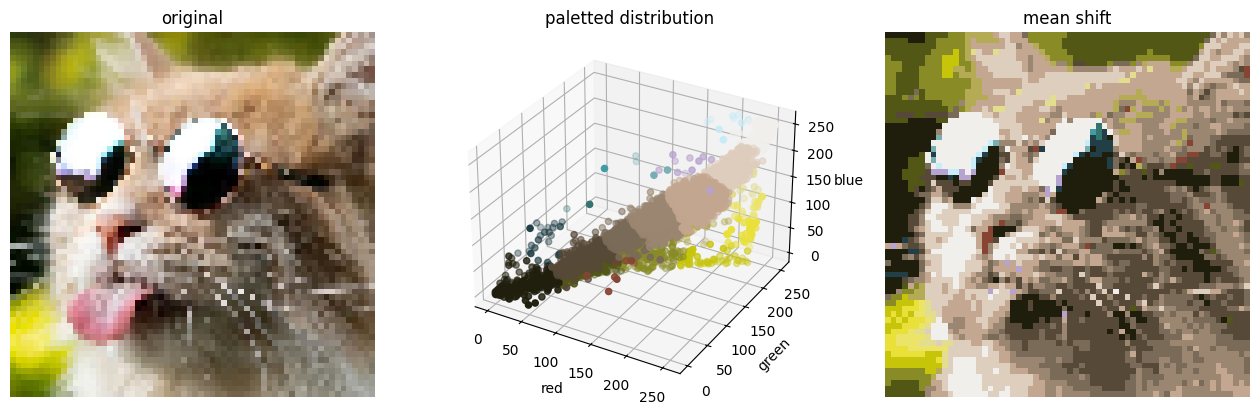

In [69]:
from sklearn.cluster import MeanShift
fig = plt.figure(figsize=(16,16))

# parametry
bandwidth = 30

# obraz porównawczy
show_image(image, 'original', fig, 1, 3, 1)

# algorytm
ms = MeanShift(bandwidth=bandwidth)
mapping = ms.fit_predict(pixels)
palette = scatter(pixels, mapping, fig, 1, 3, 2)

# obraz ze zredukowaną paletą
image4 = substitute(image, palette)
show_image(image4, 'mean shift', fig, 1, 3, 3)

plt.show()

# Porównanie wyników

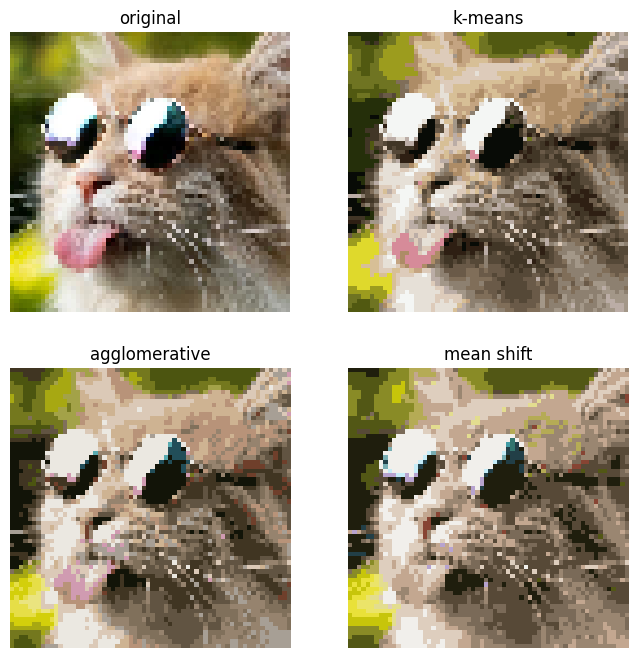

In [71]:
fig = plt.figure(figsize=(8,8))

show_image(image, 'original', fig, 2, 2, 1)
show_image(image2, 'k-means', fig, 2, 2, 2)
show_image(image3, 'agglomerative', fig, 2, 2, 3)
show_image(image4, 'mean shift', fig, 2, 2, 4)

plt.show()
